In [19]:
import numpy as np
import nibabel as nib
from nilearn import datasets #provides nilearn example datasets as well as brain parcellation atlases
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt

In [20]:
# fetch and store atlas
parcel_dir = '/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/resources/rois/'
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)

In [21]:
# see keys stores in dict object
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

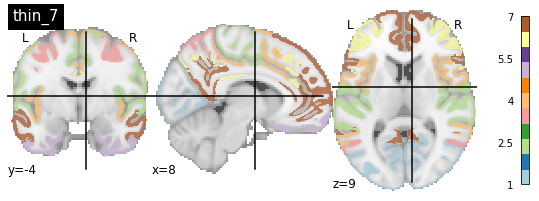

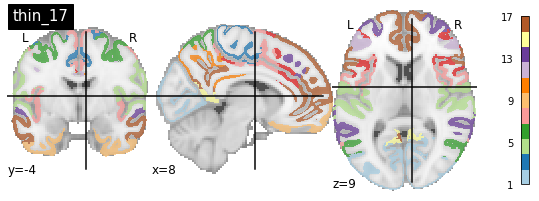

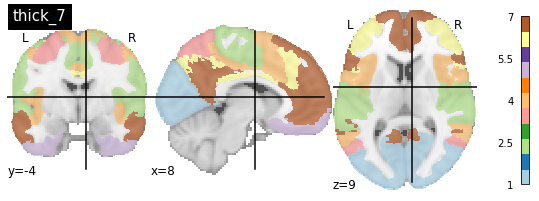

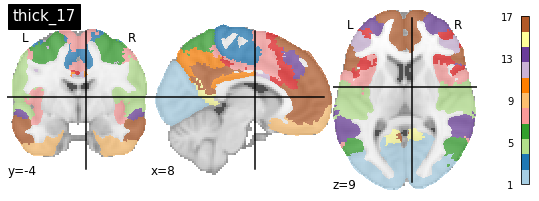

In [22]:
# plot atlas

# define slices
cut_coords=(8, -4, 9)
# show colorbar
colorbar = True
# color scheme
cmap='Paired'

#Plot parcellation schemas
plotting.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')
plotting.plot_roi(atlas_yeo_2011['thin_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_17')
plotting.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
plotting.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')


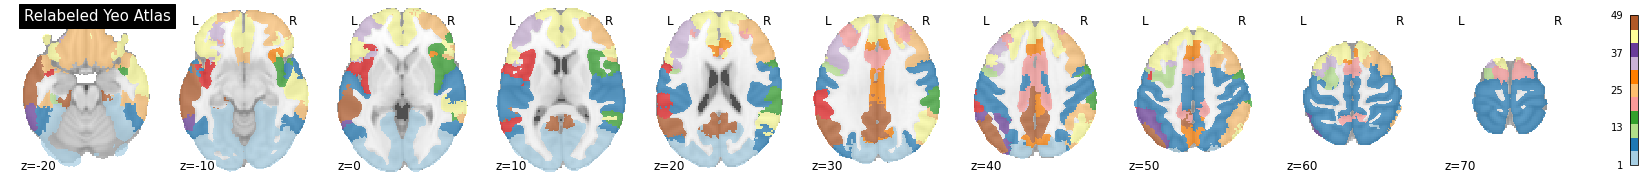

In [23]:
# Spatial separation of network

from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo_2011['thick_7'])
plotting.plot_roi(region_labels,
                 cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
                 display_mode = 'z',
                 colorbar = True,
                 cmap = 'Paired',
                 title = 'Relabeled Yeo Atlas')

In [24]:
# Save separated atlas version

region_labels.to_filename('/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

In [25]:
# Resample atlas - check size of func vs atlas

func_file = '/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/sub-mfcc003/func/sub-mfcc003_task-n1_acq-epi_rec-fmap_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
func_img = nib.load(func_file)

print('Size of func file:', func_img.shape)
print('Size of atlas file:', region_labels.shape)

Size of func file: (49, 58, 49, 147)
Size of atlas file: (256, 256, 256)



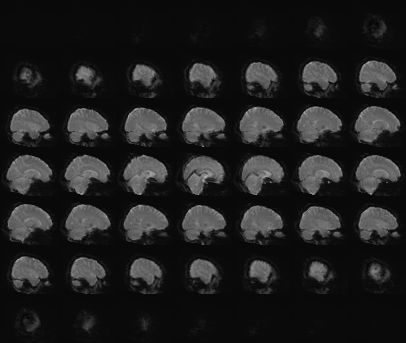
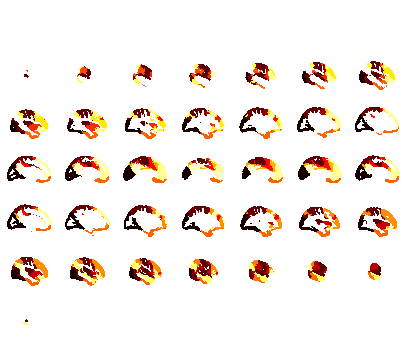

In [26]:
#resample atlas to func size

resampled_atlas = image.resample_to_img(region_labels,func_img,interpolation='nearest')
plotting.view_img(resampled_atlas,func_img.slicer[:,:,:,54])

In [15]:
print('Size of func file:', func_img.shape)
print('Size of atlas file:', resampled_atlas.shape)

Size of func file: (49, 58, 49, 147)
Size of atlas file: (49, 58, 49)


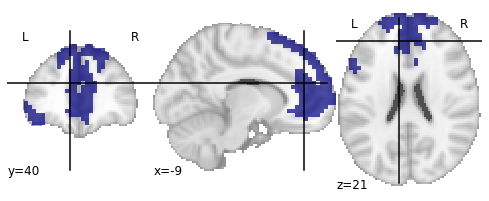

In [16]:
# Visualize ROIs

from nilearn import image

roi = 44
roi_mask = image.math_img('a== {}'.format(roi), a=resampled_atlas)
masked_resamp_yeo = image.math_img('a*b',a=resampled_atlas,b=roi_mask)
plotting.plot_roi(masked_resamp_yeo)

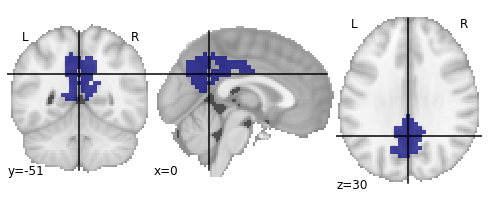

In [17]:
roi = 46
roi_mask = image.math_img('a== {}'.format(roi), a=resampled_atlas)
masked_resamp_yeo = image.math_img('a*b',a=resampled_atlas,b=roi_mask)
plotting.plot_roi(masked_resamp_yeo)